In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
import random

In [11]:
df_frames = pd.read_csv("../data/fb_data_with_predictions.csv", on_bad_lines='skip')

In [12]:
highlevel_unions = pd.read_csv("../data/mapping_fb_unions.csv")
highlevel_unions = highlevel_unions.dropna(subset=["account_match"])

In [13]:
df_frames["main_union"] = df_frames["surface.username"].map(highlevel_unions.set_index("account_match")["union"].to_dict())

## Sample and get average

In [14]:
df_frames["main_union"].value_counts().min()

779

In [ ]:
len(df_frames[(df_frames["diagnostic"] == 0)&(df_frames["prognostic"] == 0)&(df_frames["motivational"] == 0)&(df_frames["community"] == 0)&(df_frames["engagement"] == 0)])

18039

In [16]:
df_frames["main_union"].value_counts().describe()

count       40.000000
mean      3937.950000
std       2540.434113
min        779.000000
25%       1920.500000
50%       3053.000000
75%       5441.750000
max      10452.000000
Name: count, dtype: float64

In [ ]:
list_values = []
for i in range(5):
    # sample df_frames stratified by main_union
    random.seed(i)
    df_frames_sample = df_frames.groupby("main_union", group_keys=False).apply(lambda x: x.sample(min(len(x), df_frames["main_union"].value_counts().min())))
    df_frames_sample = df_frames_sample.reset_index(drop=True)

    overall_use_diagnostic_sample = df_frames_sample[df_frames_sample["diagnostic"]==1.0].shape[0]/df_frames_sample.shape[0]
    overall_use_prognostic_sample = df_frames_sample[df_frames_sample["prognostic"]==1.0].shape[0]/df_frames_sample.shape[0]
    overall_use_motivational_sample = df_frames_sample[df_frames_sample["motivational"]==1.0].shape[0]/df_frames_sample.shape[0]
    overall_use_community_sample = df_frames_sample[df_frames_sample["community"]==1.0].shape[0]/df_frames_sample.shape[0]
    overall_use_engagement_sample = df_frames_sample[df_frames_sample["engagement"]==1.0].shape[0]/df_frames_sample.shape[0]
    # overall_use_political_endorsement_sample = df_frames_sample[df_frames_sample["political_endorsement"]==1.0].shape[0]/df_frames_sample.shape[0]

    list_values.append([overall_use_diagnostic_sample, overall_use_prognostic_sample, overall_use_motivational_sample, overall_use_community_sample, overall_use_engagement_sample])

df_frames_sample = pd.DataFrame(list_values, columns=["overall_use_diagnostic", "overall_use_prognostic", "overall_use_motivational", "overall_use_community", "overall_use_engagement"])


In [18]:
mean_overall_usage = df_frames_sample.median()
mean_overall_usage

overall_use_diagnostic      0.406964
overall_use_prognostic      0.280648
overall_use_motivational    0.153498
overall_use_community       0.394705
overall_use_engagement      0.233472
dtype: float64

In [ ]:
list_use_frames = []
for union in df_frames["main_union"].unique():
    df_union = df_frames[df_frames["main_union"] == union].copy()

    if df_union.shape[0] == 0:
        continue

    df_union_use_diagnostic = df_union[df_union["diagnostic"]==1.0].shape[0]/df_union.shape[0]
    df_union_use_prognostic = df_union[df_union["prognostic"]==1.0].shape[0]/df_union.shape[0]
    df_union_use_motivational = df_union[df_union["motivational"]==1.0].shape[0]/df_union.shape[0]
    df_union_use_community = df_union[df_union["community"]==1.0].shape[0]/df_union.shape[0]
    df_union_use_engagement = df_union[df_union["engagement"]==1.0].shape[0]/df_union.shape[0]
    # df_union_use_political_endorsement = df_union[df_union["political_endorsement"]==1.0].shape[0]/df_union.shape[0]

    list_use_frames.append([union, df_union_use_diagnostic, df_union_use_prognostic, df_union_use_motivational, df_union_use_community, df_union_use_engagement])
df_use_frames = pd.DataFrame(list_use_frames, columns=["main_union", "use_diagnostic", "use_prognostic", "use_motivational", "use_community", "use_engagement"])



In [21]:
df_use_frames["use_diagnostic_norm"] = (df_use_frames["use_diagnostic"] - mean_overall_usage["overall_use_diagnostic"])/mean_overall_usage["overall_use_diagnostic"]
df_use_frames["use_prognostic_norm"] = (df_use_frames["use_prognostic"] - mean_overall_usage["overall_use_prognostic"])/mean_overall_usage["overall_use_prognostic"]
df_use_frames["use_motivational_norm"] = (df_use_frames["use_motivational"] - mean_overall_usage["overall_use_motivational"])/mean_overall_usage["overall_use_motivational"]
df_use_frames["use_community_norm"] = (df_use_frames["use_community"] - mean_overall_usage["overall_use_community"])/mean_overall_usage["overall_use_community"]
df_use_frames["use_engagement_norm"] = (df_use_frames["use_engagement"] - mean_overall_usage["overall_use_engagement"])/mean_overall_usage["overall_use_engagement"]
# df_use_frames["use_political_endorsement_norm"] = (df_use_frames["use_political_endorsement"] - mean_overall_usage["overall_use_political_endorsement"])/mean_overall_usage["overall_use_political_endorsement"]


In [22]:
df_use_frames_work = df_use_frames.copy()
df_use_frames_work.drop(columns=["use_diagnostic", "use_prognostic", "use_motivational", "use_community", "use_engagement"], inplace=True)

In [23]:
df_use_frames_work[["use_diagnostic_norm", "use_prognostic_norm", "use_motivational_norm", "use_community_norm", "use_engagement_norm"]] = df_use_frames_work[["use_diagnostic_norm", "use_prognostic_norm", "use_motivational_norm", "use_community_norm", "use_engagement_norm"]].apply(lambda x: x*100)

In [25]:
df_use_frames_work["main_union"] = df_use_frames_work["main_union"].replace("roofers and waterproofers", "roofers")

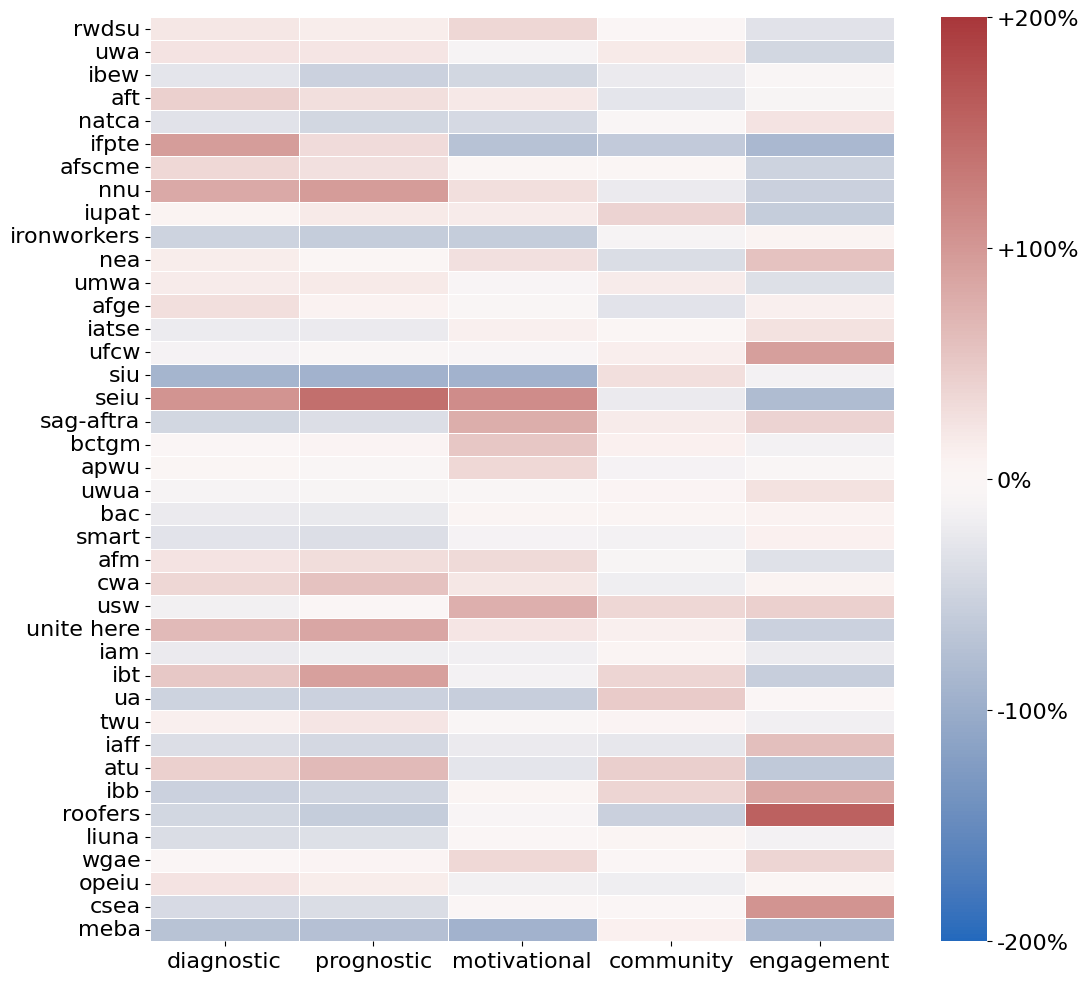

In [27]:
plt.figure(figsize=(12, 12))
ax = sns.heatmap(
    df_use_frames_work.set_index("main_union"),
    cmap="vlag",
    linewidths=0.5,
    fmt=".2f",
    center=0,
    vmin=-200,
    vmax=200,
)

# get the colorbar and relabel ticks
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([-200, -100, 0, 100, 200])
colorbar.set_ticklabels(["-200%", "-100%", "0%", "+100%", "+200%"], fontsize=16)

# Change x-tick labels
ax.set_xticklabels(
    ["diagnostic", "prognostic", "motivational", "community", "engagement"],  # <-- put your custom labels here
    rotation=0,  # rotate if needed
    fontsize=16
)


ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=16)

plt.xlabel("")
plt.ylabel("")
plt.savefig("../../../plots/for-paper/frames_by-union.svg", bbox_inches="tight")